In [1]:
import pandas as pd
import numpy as np

df = pd.DataFrame({'sex' : ['M', 'F', np.nan, 'M', 'F'],
                   'score' : [5, 4, 3, 4, np.nan]})
df

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0
4,F,NaN


In [2]:
df['score'] + 1

0    6.0
1    5.0
2    4.0
3    5.0
4    NaN
Name: score, dtype: float64

In [3]:
pd.isna(df)

,sex,score
0,False,False
1,False,False
2,True,False
3,False,False
4,False,True


In [4]:
pd.isna(df).sum()

sex      1
score    1
dtype: int64

In [5]:
df.dropna(subset=['score'])

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0


In [6]:
df_nomiss = df.dropna(subset=['score'])
df_nomiss['score'] + 1

0    6.0
1    5.0
2    4.0
3    5.0
Name: score, dtype: float64

In [7]:
df_nomiss = df.dropna(subset=['score', 'sex'])
df_nomiss

,sex,score
0,M,5.0
1,F,4.0
3,M,4.0


In [8]:
df_nomiss2 = df.dropna()
df_nomiss2

,sex,score
0,M,5.0
1,F,4.0
3,M,4.0


In [9]:
exam = pd.read_csv('exam.csv')
exam.loc[[2, 7, 14], ['math']] = np.nan
exam

,id,nclass,math,english,science
0,1,1,50.0,98,50
1,2,1,60.0,97,60
2,3,1,NaN,86,78
3,4,1,30.0,98,58
4,5,2,25.0,80,65
5,6,2,50.0,89,98
6,7,2,80.0,90,45
7,8,2,NaN,78,25
8,9,3,20.0,98,15
9,10,3,50.0,98,45


In [10]:
exam['math'].mean()

55.23529411764706

In [11]:
exam['math'] = exam['math'].fillna(55)
exam

,id,nclass,math,english,science
0,1,1,50.0,98,50
1,2,1,60.0,97,60
2,3,1,55.0,86,78
3,4,1,30.0,98,58
4,5,2,25.0,80,65
5,6,2,50.0,89,98
6,7,2,80.0,90,45
7,8,2,55.0,78,25
8,9,3,20.0,98,15
9,10,3,50.0,98,45


In [12]:
exam['math'].isna().sum()

0

In [13]:
mpg = pd.read_csv('mpg.csv')
mpg.loc[[64, 123, 130, 152, 211], 'hwy'] = np.nan

In [14]:
mpg[['drv', 'hwy']].isna().sum()

drv    0
hwy    5
dtype: int64

In [15]:
mpg.dropna(subset=['hwy']).groupby('drv').agg(mean_hwy = ('hwy', 'mean'))

,mean_hwy
drv,
4,19.242424
f,28.200000
r,21.000000


In [16]:
df = pd.DataFrame({'sex' : [1, 2, 1, 3, 2, 1],
                   'score' : [5, 4, 3, 4, 2, 6]})
df

,sex,score
0,1,5
1,2,4
2,1,3
3,3,4
4,2,2
5,1,6


In [17]:
df['sex'].value_counts().sort_index()

sex
1    3
2    2
3    1
Name: count, dtype: int64

In [18]:
df['score'].value_counts().sort_index()

score
2    1
3    1
4    2
5    1
6    1
Name: count, dtype: int64

In [19]:
df['sex'] = np.where(df['sex'] == 3, np.nan, df['sex'])
df

,sex,score
0,1.0,5
1,2.0,4
2,1.0,3
3,NaN,4
4,2.0,2
5,1.0,6


In [20]:
# score가 5보다 크면 NaN 부여
df['score'] = np.where(df['score'] > 5, np.nan, df['score'])
df

,sex,score
0,1.0,5.0
1,2.0,4.0
2,1.0,3.0
3,NaN,4.0
4,2.0,2.0
5,1.0,NaN


In [21]:
df.dropna(subset=['sex', 'score']) \
    .groupby('sex') \
    .agg(mean_score = ('score', 'mean'))

,mean_score
sex,
1.0,4.0
2.0,3.0


<Axes: ylabel='hwy'>

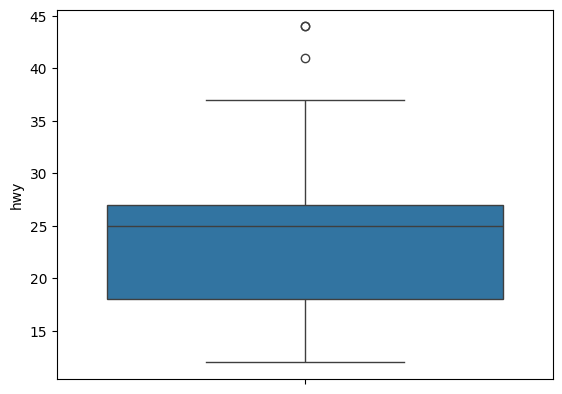

In [22]:
msg = pd.read_csv('mpg.csv')

import seaborn as sns
sns.boxplot(data = mpg, y = 'hwy')

In [23]:
pct25 = mpg['hwy'].quantile(.25)   
pct25

18.0

In [24]:
pct75 = mpg['hwy'].quantile(.75)
pct75

27.0

In [25]:
iqr = pct75 - pct25
iqr 

9.0

In [26]:
pct25 - 1.5 * iqr   # 하한

4.5

In [27]:
pct75 + 1.5 * iqr   # 상한

40.5

In [28]:
mpg['hwy'] = np.where((mpg['hwy'] < 4.5) | (mpg['hwy'] > 40.5), np.nan, mpg['hwy'])
mpg['hwy'].isna().sum()

8

In [30]:
mpg.dropna(subset=['hwy']) \
    .groupby('drv') \
    .agg(mean_hwy = ('hwy', 'mean'))

,mean_hwy
drv,
4,19.242424
f,27.764706
r,21.000000


In [31]:
mpg = pd.read_csv('mpg.csv')
mpg.loc[[9, 13, 57, 92], 'drv'] = 'k'
mpg.loc[[28, 42, 128, 202], 'cty'] = [3, 4, 39, 42]

In [32]:
mpg['drv'].value_counts().sort_index()

drv
4    100
f    106
k      4
r     24
Name: count, dtype: int64

In [37]:
mpg['drv'] = np.where(mpg['drv'] == 'k', np.nan, mpg['drv'])
mpg['drv'].isna().sum()

4

<Axes: ylabel='cty'>

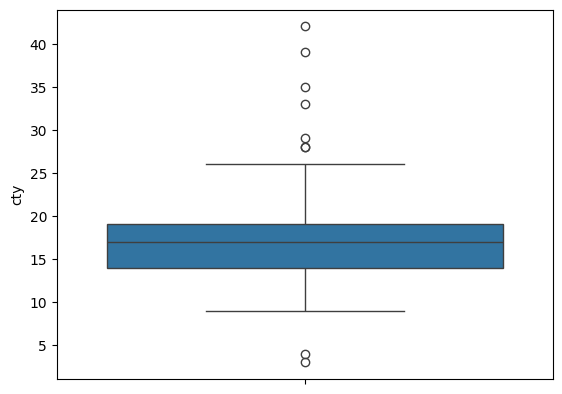

In [38]:
sns.boxplot(data=mpg, y='cty')

In [39]:
pct25 = mpg['cty'].quantile(.25)
pct75 = mpg['cty'].quantile(.75) 
iqr = pct75 - pct25

In [40]:
pct25 - 1.5 * iqr

6.5

In [41]:
pct75 + 1.5 * iqr

26.5

<Axes: ylabel='cty'>

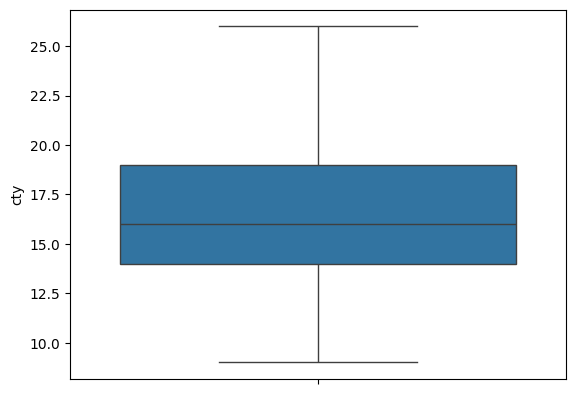

In [44]:
mpg['cty'] = np.where((mpg['cty'] < 6.5) | (mpg['cty'] > 26.5), np.nan, mpg['cty'])
sns.boxplot(data=mpg, y='cty')

In [45]:
mpg.dropna(subset=['drv', 'cty']) \
    .groupby('drv') \
    .agg(mean_cty = ('cty', 'mean'))

,mean_cty
drv,
4,14.247423
f,19.470000
r,13.958333
